### EDA on haberman dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

We put header as none to remove unwanted column names and provide relevant names by contacting the business expert / sources from where we get the data

In [2]:
df = pd.read_csv("haberman.csv", header = None,
            names = ['Age', 'Operation_Year', 'Axial_node', 'Survival_status'])
#as the values are  ; separated

In [3]:
df.head()

,Age,Operation_Year,Axial_node,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.tail()

,Age,Operation_Year,Axial_node,Survival_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [5]:
df.shape # we have 306 samples with 4 columns

(306, 4)

In [6]:
df.columns.values

array(['Age', 'Operation_Year', 'Axial_node', 'Survival_status'],
      dtype=object)

In [7]:
df.info() # all the features are having int data type and we do not need 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Operation_Year   306 non-null    int64
 2   Axial_node       306 non-null    int64
 3   Survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.6 KB


In [8]:
df.describe()

,Age,Operation_Year,Axial_node,Survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


By comparing mean with 50% there are a chances of getting outlier in age and axial_node.
By comparing 75% and max there are chances of getting oulier in age and axial_node as max value of axial_node is very large as compared to 75%.

In [9]:
df.Survival_status.unique()

array([1, 2], dtype=int64)

It has two categories 1 & 2

In [10]:
df.Survival_status.value_counts()

1    225
2     81
Name: Survival_status, dtype: int64

category 1 has large number of values as compared to category 2

<AxesSubplot:xlabel='Survival_status', ylabel='Density'>

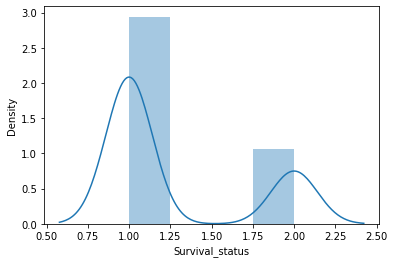

In [11]:
sns.distplot(df.Survival_status)

<AxesSubplot:xlabel='Age', ylabel='Density'>

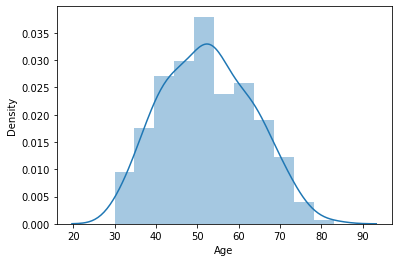

In [12]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Axial_node', ylabel='Density'>

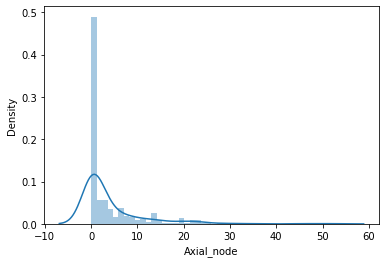

In [13]:
sns.distplot(df['Axial_node'])

<AxesSubplot:xlabel='Operation_Year', ylabel='Density'>

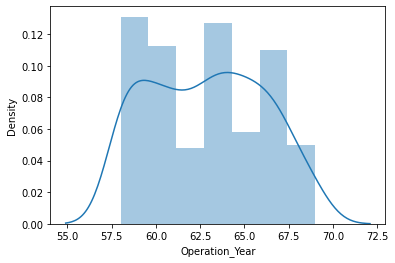

In [14]:
sns.distplot(df['Operation_Year'])

In [15]:
print("The skew value for axial node is", df['Axial_node'].skew())

The skew value for axial node is 2.9838229044308258


In [16]:
print("The kurtosis value for axial node is", df['Axial_node'].kurtosis())

The kurtosis value for axial node is 11.730876914649611


In [17]:
print("The skew value for age is", df['Age'].skew())

The skew value for age is 0.14650505649010387


In [18]:
print("The kurtosis value for age is", df['Age'].kurtosis())

The kurtosis value for age is -0.589393038395932


# Probability distribution function

Probablity Distribution Function value is:
 [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
Cummulative Distribution Function vale is:
 [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
        pdf       cdf
0  0.052288  0.052288
1  0.088235  0.140523
2  0.150327  0.290850
3  0.173203  0.464052
4  0.179739  0.643791
5  0.133987  0.777778
6  0.133987  0.911765
7  0.058824  0.970588
8  0.022876  0.993464
9  0.006536  1.000000
bin-edges [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


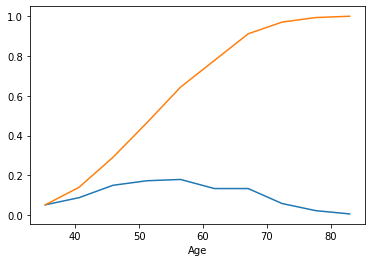

In [19]:
counts, bin_edges = np.histogram(df['Age'], bins = 10, density = True)
plt.xlabel('Age')
pdf = counts / sum(counts)
print("Probablity Distribution Function value is:\n", pdf)
cdf = np.cumsum(pdf)
print("Cummulative Distribution Function vale is:\n", cdf)
print(pd.DataFrame({'pdf' : pdf, 'cdf' : cdf}))

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

print('bin-edges', bin_edges)

Blue line is a pdf and yellow line is cdf

# Kernel density estimation

<AxesSubplot:xlabel='Age', ylabel='Density'>

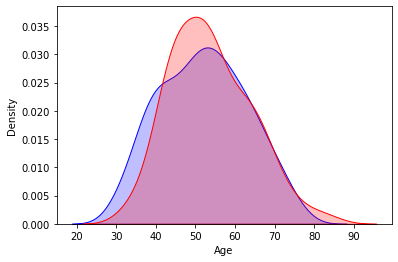

In [20]:
#sns.kdeplot(df.loc[(df['Survival_status'] == 1)], color = 'b', shade = True, label = '1')

sns.kdeplot(df.loc[(df['Survival_status'] == 1), 'Age'], color = 'b', shade = True, label = '1')
sns.kdeplot(df.loc[(df['Survival_status'] == 2), 'Age'], color = 'r', shade = True, label = '2')

<AxesSubplot:xlabel='Operation_Year', ylabel='Density'>

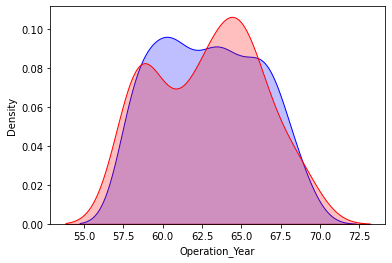

In [21]:
sns.kdeplot(df.loc[(df['Survival_status'] == 1), 'Operation_Year'], color = 'b', shade = True, label = '1')
sns.kdeplot(df.loc[(df['Survival_status'] == 2), 'Operation_Year'], color = 'r', shade = True, label = '2')

<AxesSubplot:xlabel='Age', ylabel='Operation_Year'>

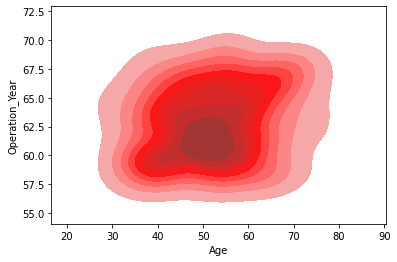

In [22]:
surv1=df.query('Survival_status==1')
surv2=df.query('Survival_status==2')
sns.kdeplot(surv1['Age'],surv1['Operation_Year'],color='r',label=1,shade=True)
#sns.kdeplot(surv2['Age'],surv2['Operation_year'],color='b',label=2,shade=True)


<AxesSubplot:xlabel='Age', ylabel='Operation_Year'>

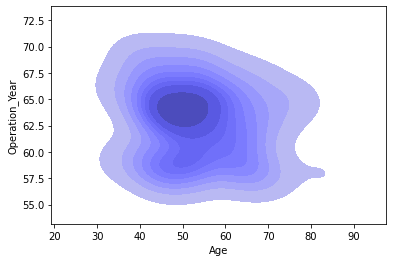

In [23]:
sns.kdeplot(surv2['Age'],surv2['Operation_Year'],color='b',label=2,shade=True)

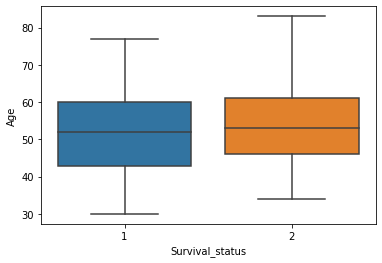

In [24]:
sns.boxplot(x='Survival_status',y='Age',data= df)
plt.show()

<AxesSubplot:xlabel='Age'>

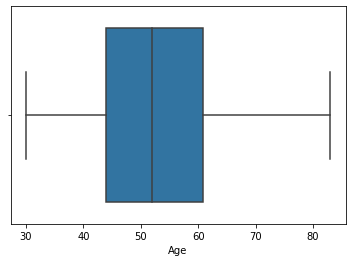

In [25]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Operation_Year', ylabel='Survival_status'>

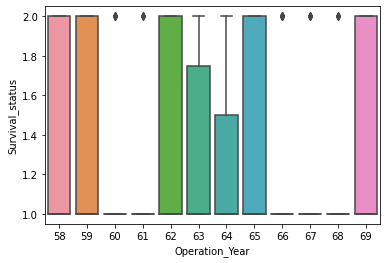

In [26]:
sns.boxplot(df['Operation_Year'], df['Survival_status'])

<AxesSubplot:xlabel='Survival_status', ylabel='Operation_Year'>

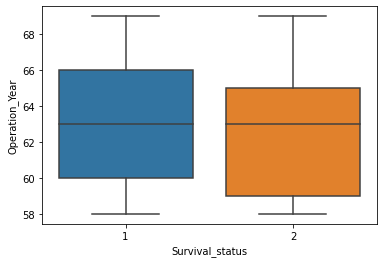

In [27]:
sns.boxplot(x = 'Survival_status', y = 'Operation_Year', data = df)

<AxesSubplot:xlabel='Survival_status', ylabel='Operation_Year'>

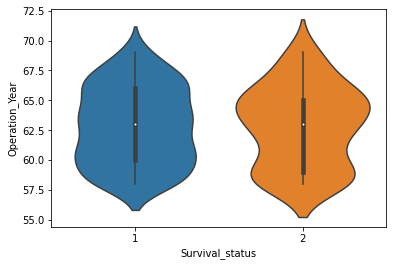

In [28]:
sns.violinplot(x = 'Survival_status', y = 'Operation_Year', data = df)

<AxesSubplot:xlabel='Survival_status', ylabel='Age'>

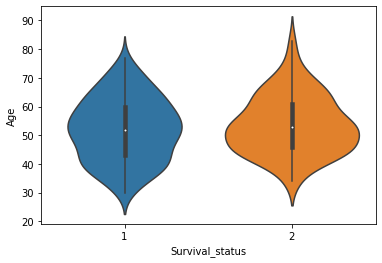

In [29]:
sns.violinplot(x = 'Survival_status', y = 'Age', data = df)

<AxesSubplot:xlabel='Survival_status', ylabel='Age'>

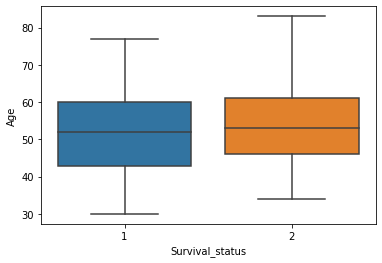

In [30]:
sns.boxplot(x = 'Survival_status', y = 'Age', data = df)

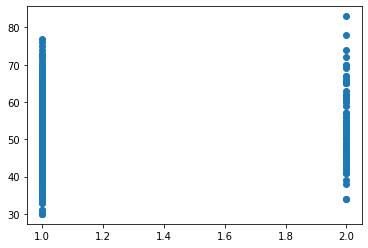

In [31]:
plt.scatter(x = 'Survival_status', y='Age', data= df)

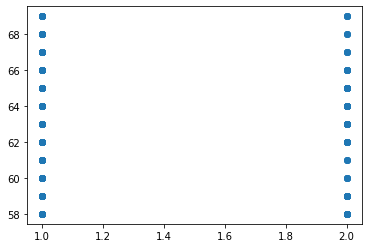

In [32]:
plt.scatter(x = 'Survival_status', y = 'Operation_Year', data = df)

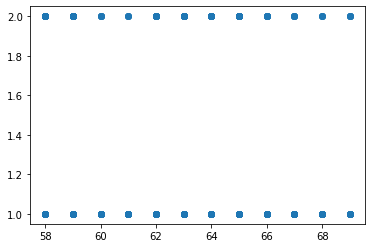

In [33]:
plt.scatter(x = 'Operation_Year', y = 'Survival_status', data = df)

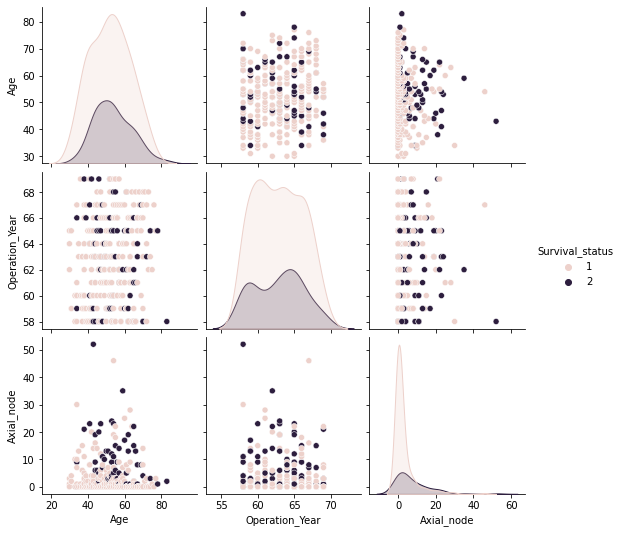

In [34]:
sns.pairplot(df, hue = 'Survival_status')

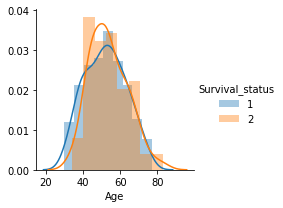

In [35]:
sns.FacetGrid(df, hue = 'Survival_status').map(sns.distplot, 'Age').add_legend()